# Wrangle & Analyze Data
> _**Wrangle & Analyze the WeRateDogs Twitter Archive**_
>
> **Sayan Chakraborty**
>
> Data Analysis Nanodegree- Project for Wrangling<br>
> _July 2020_

## Table-of-Contents

<a href="#intro">Introduction</a>

<a href="#gather">Gather Data</a>
    <ol>
        <li><a href="#gather_archive">Enhanced Twitter Archive</a></li>
        <li><a href="#gather_predictions">Image Predictions File</a></li>
        <li><a href="#gather_json_data">Download Tweet JSON Data</a></li>
    </ol>

<a href="#assess">Assess Data</a>
    <ul>
        <li><a href="#assess_archive">Archive</a></li>
        <li><a href="#assess_predictions">Predictions</a></li>
        <li><a href="#assess_json_data">JSON Data</a></li>
    </ul>

<a href="#summary">Assessment Summary</a>

<a href="#clean">Clean Data</a>

<a href="#analyze">Analyze Data</a>

---
<a id='intro'></a>
## Introduction
The "We Rate Dogs" Twitter archive contains over 5000 tweets, which have been filtered to create the enhanced archive that forms the basis of this analysis. The goal of this project is to wrangle the data - gather, assess, and clean - into a tidy dataset, and then provide analyses and visualizations.

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import time
import datetime
import random

import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

# set the option to display the full string from a pandas DataFrame
pd.options.display.max_rows
pd.set_option('display.max_colwidth', None)

---
<a id='gather'></a>
## Gather Data  
<a id='gather_archive'></a>
### 1.  Enhanced Twitter Archive

#### Data: twitter-archive-enhanced.csv

> The Twitter archive for WeRateDogs is provided from Udacity at for a starting the project.  
The file: twitter-archive-enhanced.csv has been downloaded manually from the udacity server.

---
<a id='gather_archive'></a>
### 1.  Enhanced Twitter Archive

#### Data: twitter-archive-enhanced.csv

> The Twitter archive for WeRateDogs is provided from Udacity at for a starting the project.  
The file: twitter-archive-enhanced.csv has been downloaded manually from the udacity server.

In [2]:
df_raw = pd.read_csv('Dataset/twitter-archive-enhanced.csv')
df_raw.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [4]:
# looking at a random tweet sample
df_sample_tweet = df_raw.sample(random_state=1)
df_sample_tweet

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1204,716080869887381504,NaN,NaN,2016-04-02 01:52:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a super majestic doggo and a sunset 11/10 https://t.co/UACnoyi8zu,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/716080869887381504/photo/1,https://twitter.com/dog_rates/status/716080869887381504/photo/1",11,10,None,doggo,None,None,None


In [5]:
df_sample_tweet.text

1204    Here's a super majestic doggo and a sunset 11/10 https://t.co/UACnoyi8zu
Name: text, dtype: object

In [6]:
df_sample_tweet.expanded_urls

1204    https://twitter.com/dog_rates/status/716080869887381504/photo/1,https://twitter.com/dog_rates/status/716080869887381504/photo/1
Name: expanded_urls, dtype: object

In [7]:
df_sample_tweet.source

1204    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

<a id='gather_predictions'></a>
### 2. Image Predictions File

#### Data: image_predictions.tsv

> This is a file containing the image predictions - the breed of the dog (or other object, animal, etc.). The predictions are done shown according to an image classification algorith through a neural network.  
It was required to download this file from the Udacity server programitically using requests libray.  
URL for file: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [8]:
img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(img_url)
print('Response status: ', response.status_code)
if (response.status_code == 200):
    print('Files Received')
else:
    print('Error in getting files from the provided link')

Response status:  200
Files Received


#### Storing the files in the local directory

In [9]:
file_name = img_url.split('/')[-1]

# checking if the file can be stored locally
store_path = 'Dataset/'+file_name
if not os.path.exists(store_path):
    with open(os.path.join('./', store_path), mode = 'wb') as file:
        file.write(response.content)
        print(store_path + ' file created successfully')
else:
    print('File already exists')

File already exists


In [10]:
# read image prediction files
df_image_preds = pd.read_csv('Dataset/image-predictions.tsv', sep='\t', engine='python')
print('Number of rows in image prediction file: ', df_image_preds.shape[0])
print('Number of columns in image prediction file: ', df_image_preds.shape[1])

Number of rows in image prediction file:  2075
Number of columns in image prediction file:  12


In [11]:
df_image_preds.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [12]:
df_image_preds.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


<a id='gather_json_data'></a>
### 3. Download Tweet JSON Data

> In this step we are querying for each set of tweets in the WeRateDogs twitter archive through the twitter API using python's tweepy library. This will the return of a JSON data. We will finally write each tweet's JSON data into into its own line into the final JSON file called tweet_json.txt.

In [13]:
# downloading the json file every time is taking almost 30 minutes. 
# I am using the json file from the udacity page

#### Read in JSON data to DataFrame
Extract the required fields from each tweet's JSON data and store in a separate file, tweet_data_extra.csv, for use during the assessment phase.

In [14]:
# read in the JSON data from the text file, and save to a DataFrame
dataframe_obj = []

with open('Dataset/tweet-json.txt', 'r') as json_file:
    # read the first line to start the loop
    line = json_file.readline()
    while line:
        json_data = json.loads(line)
        # I just need the retweet count, favourite count along with the respective tweet ids
        tweet_id = json_data['id']
        retweet_count = json_data['retweet_count']
        favoritve_count = json_data['favorite_count']
        
        # creating a list of the data from json and adding it to a list
        data_from_json = {'tweet_id': tweet_id,
                          'retweet_count': retweet_count,
                          'favorite_count': favoritve_count
                         }
        dataframe_obj.append(data_from_json)
        
        # proceeding with the next lines of the json file
        line = json_file.readline() ## end while

# creating a pandas dataframe and passing the dictionary list as the value
df_cols = ['tweet_id', 'retweet_count', 'favorite_count']
df_tweet_data_api = pd.DataFrame(dataframe_obj, 
                                 columns = df_cols)

In [15]:
# testing the dataframe which was just created
df_tweet_data_api.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [16]:
# checking the null values and the duplicates
df_tweet_data_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [17]:
# creating a new csv value and saving the dataframe object for referencing further:
df_tweet_data_api.to_csv('Dataset/tweet_data_api.csv', index = False)

---
<a id='assess'></a>
## Assess Data
In this section the gathered data is assessed using graph plots and codes to check for quality and tidiness issues.  
A thing to note here in this projects is that for this analysis, it is required that only tweets with original ratings with images are assessed with no retweets, be retained.  

The following dimensions of criteria are checked: 
<i>
1. Completeness  
2. Validity  
3. Accuracy  
4. Consistency  
</i>

<a id='assess_archive'></a>
### `Archive`

In [18]:
# Load the data files gathered till now
df_archive = pd.read_csv('Dataset/twitter-archive-enhanced.csv')
df_preds = pd.read_csv('Dataset/image-predictions.tsv', sep = '\\t', engine = 'python')
df_json_data = pd.read_csv('Dataset/tweet_data_api.csv')

In [19]:
# looking at the basic structure of the data
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
2356-2297

59

### Observations  
>> <b>Retweet Status</b>    
   There are 181 retweets, the details of which are seen at the columns: ['retweet_status_id', 'retweet_status_user_id', 'retweet_status_timestamp']  

>> <b>Replies</b>  
   There are 78 replies ['in_reply_to_status_id', 'in_reply_to_user_id']  
   
>> <b>Tweets with expanded urls</b>  
   There are 59 missing values in the expanded_url column, which contain 2297 entries [2356-2297]  
   
>> <b>Timestamp format</b>  
   Timestamp is in string format (object), which needs to be changed to the default format for timestamps.  
   
>> <b>Categories of Dogs</b>    
   There are 4 categories of dogs:
       1. doggo  
       2. floofer  
       3. pupper  
       4. puppo  
The categorization of dogs seems a big weird. I feel there was no need to create 4 seperate columns for each category and mark the correct one like 'one-hot encoding'. There could have been a single column, which would just contain the category details. That would be more easy to read, understand and observe I guess. We need to look into this situation as well.
       
>> <b>Original Tweets only</b>  
    The retweets and replies columns are not original tweets. Hence they can be dropped.      

#### Some visual observations

In [21]:
df_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### 1. Regarding the Timestamp

As seen from this, the timestamp column has values entered in string format (python objects)


### 2. Regarding the Name

In [22]:
df_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [23]:
df_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600524156928/photo/1,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090499244032/photo/1,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525042405380/photo/1,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twi

In [24]:
# from the tail entries it seems there are some problems with the name column:
# where there are names like 'a', 'an' etc. 
# let us take a zoom into the names columns and explore that a bit

unique_names = df_archive['name'].nunique()
print('There are a total of {} of unique names.'.format(unique_names))

#filtering out strings which are of length <= 3


# function to print the names of a particular length
def find_names_of_len(n):    
    names_ls = []
    for name in df_archive['name']:
        if len(name) <= n:
            names_ls.append(name)
    return names_ls

# looking at names of length <= 3
names_3 = find_names_of_len(3)
print('Total number of names where length is <= 3 is {}'.format(len(names_3)))
print('Strange names: ')
print(names_3)

There are a total of 957 of unique names.
Total number of names where length is <= 3 is 179
Strange names: 
['Jax', 'Ted', 'Jim', 'Gus', 'Rey', 'a', 'Aja', 'Jed', 'Leo', 'Ken', 'Max', 'Ava', 'Eli', 'Ash', 'Leo', 'not', 'Mia', 'Leo', 'Gus', 'one', 'Ike', 'Mo', 'Bo', 'Bo', 'Tom', 'Ken', 'Alf', 'Sky', 'Tyr', 'Moe', 'Ted', 'Sam', 'Gus', 'Ito', 'Bo', 'Doc', 'Bo', 'Tyr', 'a', 'Eli', 'Bo', 'mad', 'Leo', 'Bo', 'Doc', 'Jay', 'Mya', 'an', 'O', 'a', 'Al', 'Lou', 'my', 'Eve', 'Bo', 'Jax', 'one', 'Dex', 'Ace', 'Max', 'Zoe', 'Jax', 'Bo', 'Blu', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'Gus', 'a', 'Ted', 'Leo', 'mad', 'Jax', 'all', 'Sid', 'a', 'old', 'a', 'Max', 'a', 'a', 'a', 'an', 'a', 'a', 'Ole', 'Bob', 'a', 'Leo', 'the', 'the', 'Obi', 'Jax', 'Bo', 'by', 'a', 'Evy', 'Tug', 'Mia', 'a', 'the', 'Ash', 'the', 'a', 'a', 'a', 'a', 'Moe', 'Jeb', 'Ava', 'Bob', 'Gus', 'a', 'one', 'a', 'Dot', 'a', 'Eve', 'Mac', 'Ed', 'a', 'Taz', 'Cal', 'Mia', 'a', 'the', 'JD', 'Jax', 'Pip', 'Lou', 'a', 'Amy', 'Gin', 'Edd',

Ok, so there are some proper names which are of size 3. I just wanted to look whether there are any names like 'aaa' or any such random values. Seems like this is fine. I could have used a regex to check this. But tbh, I need to polish my regex skills a bit more! Also there could be some nifty string slicing techniques that could also present some fascinating results. But I am going for the old fashioned way here.

In [25]:
# let me look into the names of size 2 then:
names_2 = find_names_of_len(2)
print('Total number of names where length is <= 2 is {}'.format(len(names_2)))
print('Strange names: ')
print(names_2)

Total number of names where length is <= 2 is 79
Strange names: 
['a', 'Mo', 'Bo', 'Bo', 'Bo', 'Bo', 'a', 'Bo', 'Bo', 'an', 'O', 'a', 'Al', 'my', 'Bo', 'Bo', 'a', 'a', 'a', 'an', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'a', 'a', 'Bo', 'by', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'Ed', 'a', 'a', 'JD', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'a', 'Jo', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'an', 'a', 'a', 'an', 'a', 'a', 'a', 'a']


To be a bit more flexible I am considering the names like "Bo", "Mo", "Jo", "Ed" (obviously a great name!), "JD" as proper dog names.  

But I don't think anyone can name their dogs: 'a', or 'an' or 'my'.  

Clearly, there was some kind of an issue here.

<i>Another observation seems to be these names are all occuring in the 3rd word in the tweet. Let us observe this a bit more:</i>

In [26]:
# let us look at some proper dog names:
df_archive['name'].value_counts().head(60)

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Daisy         7
an            7
Buddy         7
Toby          7
Oscar         6
Jax           6
Scout         6
Leo           6
Koda          6
Jack          6
Stanley       6
Dave          6
Bella         6
Milo          6
Rusty         6
Louis         5
Chester       5
Phil          5
Finn          5
Sunny         5
Bentley       5
George        5
very          5
Sammy         5
Alfie         5
Gus           5
Oakley        5
Larry         5
Winnie        4
Boomer        4
Walter        4
Scooter       4
Moose         4
Loki          4
Clarence      4
Brody         4
Maddie        4
Reggie        4
Beau          4
Ruby          4
Reginald      4
Bruce         4
Maggie        4
Sophie        4
just          4
Gerald        4
Name: name, dtype: int64

>> <b>Observation</b>:  
    As can be seen from the dog names: The proper dog names are starting with a capital letter. But as can be seen from the first entry:  
      
This can never be a dog's name!

#### Checking for null and duplicate values in the name column

In [27]:
# this can show a list of such dog names:
# list all names that are NOT capitalized
strange_names_mask = df_archive['name'].str.contains('^[a-z]', regex = True)
df_archive[strange_names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [28]:
len(df_archive[strange_names_mask]) # there are these many strange names

109

#### Finally:
This list contains 109 tweets, where there are non-capitalized words in the **name** column. None of these names can be considered as a valid dog name.

### 3. Regarding expanded_urls

In [29]:
# checking the number of missing values in expanded urls
df_archive.expanded_urls.isnull().sum()

59

In [30]:
# checking the tweets where thre are no exapanded urls but are either replies or retweets
sum(df_archive.expanded_urls.isnull() &
   (df_archive.retweeted_status_id.notnull() | df_archive.in_reply_to_status_id.notnull()))

56

#### Observation:  
Out of 59 tweets which does not have any explanded_urls, 56 are retweets or replies

In [31]:
# creating a mask for the tweets which have missing urls but are not retweets or replies
mask_temp = df_archive.expanded_urls.isnull() & \
       df_archive.in_reply_to_status_id.isnull() & \
       df_archive.retweeted_status_id.isnull()

In [32]:
# taking a look at the tweets which have missing urls but are not retweets or replies (there should be 3)
temp = df_archive[mask_temp][['tweet_id', 'text', 'expanded_urls']]
temp

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 would listen,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


Now we need to figure out what is the source of these three tweets. These three tweets are valid tweets in the sense that although there are no urls, they have valid ratings in the 'text' column.

In [33]:
missing_url_tweets = temp['tweet_id']
missing_ls = list()
for missing_url in missing_url_tweets:
    missing_ls.append(missing_url)
missing_ls

[828361771580813312, 785515384317313025, 696518437233913856]

In [34]:
# checking if the missing values are preset in the prediction dataframe
sum(df_preds['tweet_id'].isin(missing_ls))

0

In [35]:
# checking if the missing values are in the json dataframe
sum(df_json_data['tweet_id'].isin(missing_ls))

3

In [36]:
# found in the json datframe. Checking those dataframes from the json file
find_tweet_ids = df_json_data['tweet_id'].isin(missing_ls)
df_json_data[find_tweet_ids] # the tweet ids are matching

,tweet_id,retweet_count,favorite_count
374,828361771580813312,195,2408
706,785515384317313025,1477,6800
1443,696518437233913856,1887,4274


**Observation:**

> It seems that these three tweets are not present in the **predictions** table, and even though they ARE in the **json_data** table, there was NO image url extracted from the JSON data.

---
#### `rating_numerator` and `rating_denominator`

In [37]:
df_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


### Observation:  
From the describe function of the numerator and denominators, it can be seen that the maximum and minimum difference is quite large. The maximum value is 170 for the denominator and 1776 (even larger) for the numerator whereas the minimum value is 0 for both.

In [38]:
df_archive.rating_denominator.value_counts().sort_index(ascending = False)

170       1
150       1
130       1
120       1
110       1
90        1
80        2
70        1
50        3
40        1
20        2
16        1
15        1
11        3
10     2333
7         1
2         1
0         1
Name: rating_denominator, dtype: int64

In [39]:
# checking how many values there are for the denominator where the values are not 10
sum(df_archive.rating_denominator != 10)

23

In [40]:
# taking a look at those tweets which do not have a denominator of 10,
# and are not replies or are retweets

mask_criterion = (df_archive['rating_denominator'] != 10) & \
        df_archive['in_reply_to_status_id'].isnull() & \
        df_archive['retweeted_status_id'].isnull()

mask_cols = ['tweet_id', 'text', 'rating_numerator', 'rating_denominator']
df_archive[mask_criterion][mask_cols]

,tweet_id,text,rating_numerator,rating_denominator
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


In [41]:
len(df_archive[mask_criterion][mask_cols])

17

There are 17 such values where the numerator is denominator is not equal to 10 and the tweets are neither replies nor retweets.

### Observation:  
Another observation here is that there are some values which are a multiple of 10, I went ahead and opened up some of those tweets manually to see these tweets were concerned with more than one dogs (at least in the tweet images). The texts in the tweets also indicate that the tweets are about multiple dogs because it contain words like "floofs", "puppers", "pups" and "squads".  

In such cases, the let us create a column containing the numerator and denominators combined and simplified.  


 | index | tweet_id | original rating | multiple? | revised rating | comment |
 | --- | --- | --- | --- | --- | --- |
 | 433  | - |  84/70 | yes | 12/10 | drop; multiple dogs |
 | 516  | - | 24/7 | no | None | drop; no rating |
 | 902  | - | 165/150 | yes | 11/10 | drop; multiple dogs |
 | 1068 | 740373189193256964 | 9/11 | no | 14/10 | **manual fix** |
 | 1120 | - |  204/170 | yes | 12/10 | drop; multiple dogs |
 | 1165 | - |  4/20 | yes | 13/10 | drop; multiple dogs |
 | 1202 | 716439118184652801 | 50/50 | no | 10/10 | **manual fix** |
 | 1228 | - |  99/90 | yes | 11/10 | drop; multiple dogs |
 | 1254 | - |  80/80 | yes | 10/10 | drop; multiple dogs |
 | 1274 | - |  45/50 | yes | 9/10 | drop; multiple dogs |
 | 1351 | - |  60/50 | yes | 12/10 | drop; multiple dogs |
 | 1433 | - |  44/40 | yes | 11/10 | drop; multiple dogs |
 | 1635 | - |  121/110 | yes | 11/10 | drop; multiple dogs |
 | 1662 | 682962037429899265 | 7/11 | no | 10/10 | **manual fix** |
 | 1779 | - |  144/120 | yes | 12/10 | drop; multiple dogs |
 | 1843 | - |  88/80 | yes | 11/10 | drop; multiple dogs |
 | 2335 | 666287406224695296 | 1/2 | no | 9/10 | **manual fix** |

#### `rating_numerator`

In [42]:
df_archive.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [43]:
# looking at values where the numerator is creater than 15
sum(df_archive.rating_numerator >= 15)

28

**Observation:**

> This shows the values of all tweets where the numerator value is creater than 15.

Looking at all values where the denominator is 10. Then sorting up the values and printing them. 

In [44]:
df_tweets_denom_10 = df_archive[df_archive.rating_denominator == 10]
df_tweets_denom_10.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [45]:
sum(df_tweets_denom_10.rating_numerator >= 15)

12

**Observation:**

> Only taking a look at the tweets that have denominators = 10 and numerators >= 15. The reason for choosing the lower bound of the numerator as 15 is because there are only two counts for the condition >= 15, whereas if the lower bound was selected at a value of 14, then there would have been a count of 54.  
Thereafter we can check the texts of the tweets to see if the numerators make sense and is at par with the emotion of the tweets.

> We will be ignoring the retweets and the replies from here. 

In [46]:
# display tweets with numerator >= 15 that DO have denominator of 10,
# and are NOT replies and are NOT retweets
mask_finder = (df_archive.rating_denominator == 10) & \
            (df_archive.rating_numerator >= 15) & \
            df_archive.in_reply_to_status_id.isna() & \
            df_archive.retweeted_status_id.isna()

masked_cols = ['text', 'tweet_id', 'rating_numerator', 'rating_denominator']
df_archive[mask_finder][masked_cols]

,text,tweet_id,rating_numerator,rating_denominator
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",786709082849828864,75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,778027034220126208,27,10
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,749981277374128128,1776,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,680494726643068929,26,10
2074,After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY,670842764863651840,420,10


### Interesting observations:
Ok. This was interesting!  
- For the insanely high numerator value of 1776, I was always wondering, firstly how such a large value and secondly, why such a specific value? Turns out after looking at the tweet- "He's quite simply America af", it is quite clear that the rating is actually the year when the people from the 13 colonies agreed to the United States Declaration of Independence.  

- Now comes the value of 75, this was obvious! The Harry Potter reference. Being a potterhead myself, it took me no time to figure out the "Platform number 9 and 3 quarters!". But it seems that the rating column had something wrong, wherein it recorded only the 75 and not 9.75 which is the actual rating.  

- Now comes the value 420. I understood it only after I opened up the actual tweet and saw the image of Snoop Dogg. Then it made sense. The number was from the song title 420.  

- Lastly for 27, after opening up the tweet, saw that the actual rating was 11.27. But here it is recorded as 27.  

A general trend seems that if there are any floating point numbers, then only the values after the decimal point is taken as the rating numbers. Have to look into this.  

Finally as a last thought on what could be done with these values, I think, since I am not in a position to impose my own ratings for those values and also because there are only 5 such values which are showing such behaviors, it would be better decision if I dropped them. 

In [47]:
# now let us see if there are any tweets where the numerator = 0 and denominator = 10
# also we will not be considering any replies or retweets in this case.

mask_num_0 = (df_archive['rating_numerator'] == 0) & \
             (df_archive['rating_denominator'] == 10) & \
             df_archive['in_reply_to_status_id'].isnull() & \
             df_archive['retweeted_status_id'].isnull()

# masked_columns are the same as the ones used in the previous code cell
df_archive[mask_num_0][masked_cols]

,text,tweet_id,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,835152434251116546,0,10


Ok, so here we do have a tweet with a numerator value of 0. Also, this tweet looks legit enough.

#### `source`

In [48]:
df_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

**Observations:**
> There are only 4 types of tweet sources.  
  These tweets can be simplified by using the display string portion just before the final "<\a>":
 - Twitter for iPhone
 - Vine - Make a Scene
 - Twitter Web Client
 - TweetDeck

#### `doggo`, `floofer`, `pupper`, and `puppo`- The dog categries

In [49]:
df_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [50]:
df_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [51]:
df_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [52]:
df_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [53]:
df_archive[df_archive.floofer == 'floofer'].text

46       Meet Grizzwald. He may be the floofiest floofer I ever did see. Lost eyes saving a schoolbus from a volcano erpuption. 13/10 heroic as h*ck https://t.co/rf661IFEYP
200     At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk
582                                              This is Doc. He takes time out of every day to worship our plant overlords. 12/10 quite the floofer https://t.co/azMneS6Ly5
774                                         Atlas rolled around in some chalk and now he's a magical rainbow floofer. 13/10 please never take a bath https://t.co/nzqTNw0744
984                              This is Blu. He's a wild bush Floofer. I wish anything made me as happy as bushes make Blu. 12/10 would frolic with https://t.co/HHUAnBb6QB
1022                                   Here's a golden floofer helping with the groceries. Bed got in way. Still 11/10 helpful af (vid 

**Observation:**
> Looking at the floofer category, it seems there are a few ways that this category is spelled: "floofer", "floofiest", and "Floofer".  
Similarly, the other dog categories may be spelled in such unique ways.

---
<a id='assess_predictions'></a>
### `predictions`

In [54]:
df_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**Observation**
> It seems like there are no null values in any of the columns for the prediction dataframe. There are a total of 2075 values in each of the columns and there are 12 columns in total. 

In [55]:
df_preds.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


Looking at the head values, it is obvious, that for the columns, p1_dog, p2_dog and p3_dog, there true as well as false values. 

In [56]:
# example: we could see the value_counts for all these three columns:
df_preds['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [57]:
df_preds['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [58]:
df_preds['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [59]:
# let us look at the cases where the predictions are not dogs in all three cases. 
mask_no_dogs = ~df_preds['p1_dog'] & \
               ~df_preds['p2_dog'] & \
               ~df_preds['p3_dog']
df_preds[mask_no_dogs].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False


In [60]:
print('There are a total of {} cases where the predictions were false for dogs.'.format(mask_no_dogs.sum()))

There are a total of 324 cases where the predictions were false for dogs.


---
<a id='assess_json_data'></a>
### `json_data`

In [61]:
df_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [62]:
df_json_data.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [63]:
df_json_data.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


<a id='summary'></a>

---
## Assessment Summary

### Quality

### `archive`

<a href="#clean_qa1">[ 1.  ]</a> There are 181 retweets (**retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**).

<a href="#clean_qa2">[ 2.  ]</a> There are 78 reply tweets (**in_reply_to_status_id, in_reply_to_user_id**).

<a href="#clean_qa3">[ 3.  ]</a> There are 2297 tweets with **expanded_urls** (links to the tweet), indicating 59 tweets with missing data.
   1. 56 of these tweets are replies or retweets.
   2. The remaining 3 tweets have not got the url within the **text** column. They are NOT in the **predictions** table, but even though they ARE in the **json_data**, there was NO image url in the JSON data.

<a href="#clean_qa4">[ 4.  ]</a> The **timestamp** column is in string format.

<a href="#clean_qa5">[ 5.  ]</a> There are 109 tweets with regular words in the **name** column that are NOT a valid name; these words are always the 3rd word in the tweet and are all lowercase; all valid names start with an uppercase letter.

[ 6.  ] There are 775 tweets with the dog **name** as "None". (Probably not worth looking at as there are too many to verify.) [_**This issue will not be cleaned**_]

<a href="#clean_qa7-1">[ 7.  ]</a> Ignoring replies and retweets, there are 17 tweets with **rating_denominator** NOT equal to 10.
  1. 4 tweets have the correct rating within the text, and can be manually fixed:
    - 740373189193256964: replace 9/11 with 14/10
    - 716439118184652801: replace 50/50 with 11/10
    - 682962037429899265: replace 7/11 with 10/10
    - 666287406224695296: replace 1/2 with 9/10
  2. 13 are about multiple dogs/pups, and can be dropped.

<a href="#clean_qa8">[ 8.  ]</a> There are 28 tweets with **rating_numerator** >= 15. The max value is 1776, which does not make sense. When we only look at tweets with **rating_denominator** of 10, there are 12 tweets with **rating_numerator** >= 15. Going further, by ignoring the 7 retweets and replies (these are not “original” tweets as specified in the **Key Points**) we end up with 5 tweets with a **rating_numerator** >= 15.

<a href="#clean_qa9">[ 9.  ]</a> There are only 4 types of values in the **source** column, and they can be simplified by using the display string portion just before the final "<\a>":
  - Twitter for iPhone
  - Vine - Make a Scene
  - Twitter Web Client
  - TweetDeck 

### `predictions`

<a href="#clean_qp1">[ 1.  ]</a> There are 2075 image predictions, 281 less than the number of tweets in the archive, so will be classified as "missing data".  

### `json_data`

<a href="#clean_qj1">[ 1.  ]</a> Several tweets (16 _during this run_) from the original `archive` table have been deleted since the archive was created (TweepErrors were reported). 


### Tidiness

### `archive`

<a href="#clean_ta1">[ 1.  ]</a> There are 4 columns for dog stages (**doggo, floofer, pupper, puppo**). The 4 columns for one variable doesn't conform to the rules of "tidy data". 

<a href="#clean_ta2">[ 2.  ]</a> The **Key Points** indicates that we’re only interested in “original tweets”, no “retweets” or "replies" which are not being considered as original tweets here; this data is stored in the columns **retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id**.

<a href="#clean_ta4">[ 3.  ]</a> When all **rating_denominator**s are the same (10) this column is no longer needed.

### `predictions`

[ 1. ] The table does not follow the rules of “Tidy Data”; the columns **p1**, **p2** and **p3** contain the same type of data, predictions. The columns **p1_conf**, **p2_conf** and **p3_conf** all contain values for confidence level, and columns **p1_dog**, **p2_dog** and **p3_dog** all contain Boolean values indicating whether the prediction is in fact a type of dog. [_**This issue will not be cleaned**_]

[ 2. ] The column **jpg_url** contains a link to an image file (JPG), but it’s not the same link as the **expanded_urls**  field in the `archive` dataset. It is actually the same link as the **media_url_https** field in the tweet’s JSON data. [_**This issue will not be cleaned**_]

<a href="#clean_tp3">[ 3.  ]</a> The dog breed prediction with the highest confidence level can be combined with the  `archive` table as the twitter table contains information that is all about the dog in the tweet.

### `json_data`

<a href="#clean_tj1">[ 1.  ]</a> The `json_data` table should be combined with the `archive` table.


<a id='clean'></a>

---
## Clean Data

In [64]:
# creating a copy of all the existing dataframes
df_archive_clean = df_archive.copy()
df_preds_clean = df_preds.copy()
df_json_data_clean = df_json_data.copy()

In [65]:
len_archive = df_archive_clean.shape[0]
len_archive

2356

<a id='clean_qa1'></a>
### Quality `archive` #1.
There are 181 retweets, and we’re only interested in “original tweets”.

##### Define
> Drop all rows containing retweets, where these columns will be non-null: `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

##### Code

In [66]:
# looking at the number of retweets (not considering the null values in the retweets obviously)
df_archive_clean['retweeted_status_id'].notnull().sum()

181

In [67]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isna()]

##### Test

In [68]:
# confirm the rows are dropped; compare with original table length
print("Number of values dropped: ", len_archive - len(df_archive_clean))
# resetting the variable for length of the archive
len_archive = len(df_archive_clean)

Number of values dropped:  181


---
<a id='clean_qa2'></a>
### Quality `archive` #2.
There are 78 reply tweets; we’re only interested in “original tweets”.

##### Define
> Drop all rows that are replies, those that have non-null values in these columns: `in_reply_to_status_id` and `in_reply_to_user_id`.
##### Code

In [69]:
# looking at the number of replies (not considering the null values in the replies obviously)
df_archive_clean['in_reply_to_status_id'].notnull().sum()

78

In [70]:
df_archive_clean = df_archive_clean[df_archive_clean.in_reply_to_status_id.isna()]

##### Test

In [71]:
# confirm the rows are dropped; compare with previous table length
print("Number of values dropped:  {}".format(len_archive - len(df_archive_clean)))
# reset the variable for length of the archive
len_archive = len(df_archive_clean)

Number of values dropped:  78


---
<a id='clean_qa3'></a>
### Quality `archive` #3.
Tweets with missing data in *expanded_urls* (links to the tweet).

##### Define
> Drop tweets with missing data in the `expanded_urls`.
##### Code

In [72]:
df_archive_clean = df_archive_clean[df_archive_clean.expanded_urls.notnull()]

In [73]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2094 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2094 non-null   object 
 4   source                      2094 non-null   object 
 5   text                        2094 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2094 non-null   int64  
 11  rating_denominator          2094 non-null   int64  
 12  name                        2094 non-null   object 
 13  doggo                       2094 

##### Test

In [74]:
df_archive_clean.expanded_urls.isnull().sum()

0

---
<a id='clean_qa4'></a>
### Quality `archive` #4.
The *timestamp* column is in string format, it's the wrong data type.

##### Define
> Convert `timestamp` to datetime data type.
##### Code

In [75]:
# looking at the original datatype for the columns:
df_archive_clean.dtypes 
# here timestamp needs to be changed from 'object' to 'datetime'.

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [76]:
df_archive_clean['timestamp'] = pd.to_datetime(df_archive_clean['timestamp'])
df_archive_clean['timestamp'].head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

In [77]:
df_archive_clean['timestamp'] = df_archive_clean['timestamp'].dt.floor('s')

##### Test

In [78]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2094 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2094 non-null   datetime64[ns, UTC]
 4   source                      2094 non-null   object             
 5   text                        2094 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2094 non-null   int64           

---
<a id='clean_qa5'></a>
### Quality `archive` #5.
There are many tweets with regular words in the *name* column that are NOT a valid name.

##### Define
> Replace all lowercase words in the `name` column with the string "none".
##### Code

In [79]:
names_mask = df_archive_clean.name.str.contains('^[a-z]', regex = True)
df_archive_clean[names_mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old              1
one              4
quite            3
space            1
such             1
the              8
this             1
unacceptable     1
very             4
Name: name, dtype: int64

In [80]:
df_archive_clean.loc[names_mask, 'name'] = "none"

In [81]:
# all the entries were changed to "none"
df_archive_clean[names_mask].name.value_counts().sort_index()

none    104
Name: name, dtype: int64

---
<a id='clean_qa7-1'></a>
### Quality `archive` \#7 - Part 1.
Some tweets have wrong values extracted for rating; text contains the tweeter's rating.

##### Define
> Manual fix:
- 740373189193256964: replace 9/11 with 14/10
- 716439118184652801: replace 50/50 with 11/10
- 682962037429899265: replace 7/11 with 10/10
- 666287406224695296: replace 1/2 with 9/10

##### Code

In [82]:
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 740373189193256964), 'rating_numerator'] = 11
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 740373189193256964), 'rating_denominator'] = 14

In [83]:
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 716439118184652801), 'rating_numerator'] = 11
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 716439118184652801), 'rating_denominator'] = 10

In [84]:
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 682962037429899265), 'rating_numerator'] = 10
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 682962037429899265), 'rating_denominator'] = 10

In [85]:
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 666287406224695296), 'rating_numerator'] = 9
df_archive_clean.loc[(df_archive_clean['tweet_id'] == 666287406224695296), 'rating_denominator'] = 10

##### Test

In [86]:
mask_cols = ['tweet_id', 'rating_numerator', 'rating_denominator']
df_archive_clean[(df_archive_clean.tweet_id == 740373189193256964) | \
              (df_archive_clean.tweet_id == 716439118184652801) | \
              (df_archive_clean.tweet_id == 682962037429899265) | \
              (df_archive_clean.tweet_id == 666287406224695296) ][mask_cols]

,tweet_id,rating_numerator,rating_denominator
1068,740373189193256964,11,14
1202,716439118184652801,11,10
1662,682962037429899265,10,10
2335,666287406224695296,9,10


---
<a id='clean_qa7-2'></a>
### Quality `archive` \#7 - Part 2.
Some tweets with *rating_denominator* NOT equal to 10; multiple dogs or no valid rating.

##### Define
> Drop the remaining tweets with `rating_denominator` values that are NOT equal to 10.
##### Code

In [87]:
# taking a look at the existing denominators
df_archive_clean['rating_denominator'].value_counts().sort_index(ascending=False)

170       1
150       1
120       1
110       1
90        1
80        2
70        1
50        2
40        1
20        1
14        1
10     2080
7         1
Name: rating_denominator, dtype: int64

So there are 2080 values where the denominator is 10. The rest all values will be droped.

In [88]:
df_archive_clean = df_archive_clean[df_archive_clean['rating_denominator'] == 10]

##### Test

In [89]:
# there should be only 10 in the denominator values.
df_archive_clean.rating_denominator.value_counts().sort_index(ascending = False)

10    2080
Name: rating_denominator, dtype: int64

In [90]:
# display ALL numerators
df_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
420       1
75        1
27        1
26        1
14       38
13      287
12      485
11      414
10      435
9       153
8        98
7        51
6        32
5        34
4        15
3        19
2         9
1         4
0         1
Name: rating_numerator, dtype: int64

---
<a id='clean_qa8'></a>
### Quality `archive` #8.
There are 5 tweets with *rating_numerator* >= 15, which either don't make sense or are huge.

##### Define
> Drop tweets that have `rating_numerator` >= 15.
##### Code

In [91]:
# display numerators greater than 15
df_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

1776      1
420       1
75        1
27        1
26        1
14       38
13      287
12      485
11      414
10      435
9       153
8        98
7        51
6        32
5        34
4        15
3        19
2         9
1         4
0         1
Name: rating_numerator, dtype: int64

In [92]:
# looking at values which are only greater than equal to 15
df_archive_clean[df_archive_clean['rating_numerator'] >= 15]['rating_numerator'].value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

We will be dropping all random values like 1776, 420, 75 etc. Otherwise, manually opening and setting values could also be done. Since there are only 5 such values, then we can drop them.

In [93]:
# dropping values in numerators which are greater than equal to 15
df_archive_clean = df_archive_clean[df_archive_clean['rating_numerator'] < 15]

---
<a id='clean_qa9'></a>
### Quality `archive` #9.
The *source* column can be simplified by extracting and replacing with it's display string.

#### Define
> Replace the `source` string with the display portion of itself. Extract the string between `<a href="">` and `</a>`.
#### Code

In [94]:
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1944
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [95]:
df_archive_clean['source'] = df_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [96]:
df_archive_clean.source.value_counts()

Twitter for iPhone     1944
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                10
Name: source, dtype: int64

---
<a id='clean_ta1'></a>
### Tidiness `archive` #1.
There are 4 columns for dog stages: `doggo`, `floofer`, `pupper`, `puppo`.

##### Define
> Melt the 4 columns with the dog stages:
 - Create a temporary column called `none` to store the `None` values; use lowercase 'n' to avoid confusion with 'None' special NA value.
 - Create a new column `Category` to store the categories: `doggo`, `floofer`, `pupper`, `puppo`, as well as `None`, and select the Category from the column that contains a value.
 - Cast the `Category` column to categorical data type.
 - Drop the 4 original dog stage columns, and the temporary `none` column.

##### Code

In [97]:
dog_categories = ['doggo', 'floofer', 'pupper', 'puppo']
df_archive_clean[dog_categories].describe()

,doggo,floofer,pupper,puppo
count,2075,2075,2075,2075
unique,2,2,2,2
top,None,None,None,None
freq,1992,2065,1847,2051


In [98]:
df_archive[dog_categories].isnull().sum()

doggo      0
floofer    0
pupper     0
puppo      0
dtype: int64

In [99]:
# replace the stage name with 1, and 'None' with 0, like a dummy variable
make_dummy = lambda x: 0 if x == 'None' else 1

df_archive_clean.doggo = df_archive_clean.doggo.apply(make_dummy)
df_archive_clean.floofer = df_archive_clean.floofer.apply(make_dummy)
df_archive_clean.pupper = df_archive_clean.pupper.apply(make_dummy)
df_archive_clean.puppo = df_archive_clean.puppo.apply(make_dummy)

# by adding the stage columns, we can see how many are 'none' and how many stages are set
df_archive_clean['none'] = df_archive_clean['doggo'] + df_archive_clean['floofer'] + \
                        df_archive_clean['pupper'] + df_archive_clean['puppo']

# have a look at what we have before we continue...
df_archive_clean['none'].value_counts()

0    1741
1     323
2      11
Name: none, dtype: int64

**Observation:**
> One thing that is a bit interesting here is that there are actually 11 tweets that have 2 dog categories set, so these must be tweets about multiple dogs.  
Since there are only 11 entries we can just carry on with selecting the first of the dog categories in an increasing count order like floofer, puppo, doggo and pupper to minimise information loss.

In [100]:
# if there are NO stages specified then set 'None' to 1
category_none = lambda x: 1 if x == 0 else 0

# reset values in 'none' 
df_archive_clean['none'] = df_archive_clean['none'].apply(category_none)

# Order the stages in increasing count order: floofer, puppo, doggo and pupper
# set the choice order for dog stage based on count order
category = ['floofer', 'puppo', 'doggo', 'pupper', 'none']

# set the conditions for selecting the dog stage based on count order
conditions = [
    (df_archive_clean[category[0]] == 1),
    (df_archive_clean[category[1]] == 1),
    (df_archive_clean[category[2]] == 1),
    (df_archive_clean[category[3]] == 1),
    (df_archive_clean[category[4]] == 1)]

# select the dog stage based on the first successful condition; stage[4] is 'None'
df_archive_clean['category'] = np.select(conditions, category, default = category[4])

# now we can drop the original 4 dog stage columns, AND the temporary 'None'
df_archive_clean.drop(category, axis = 1, inplace = True)

# set the 'stage' column data type to category
df_archive_clean['category'] = df_archive_clean.category.astype('category')

# Source for algorithm:    https://code.i-harness.com/en/q/19c9fbc

In [101]:
df_archive_clean['category'].value_counts()

none       1741
pupper      219
doggo        81
puppo        24
floofer      10
Name: category, dtype: int64

In [102]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2075 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2075 non-null   datetime64[ns, UTC]
 4   source                      2075 non-null   object             
 5   text                        2075 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2075 non-null   object             
 10  rating_numerator            2075 non-null   int64           

---
<a id='clean_ta2'></a>
### Tidiness `archive` #2.
All columns related to “retweets” and "replies" are going to be dropped as we will be looking only into the original tweets.

##### Define
> Since we don't want retweets and replies, we can drop all such related columns:  
<i>retweet related: </i>`retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`.  
<i>reply related: </i>`in_reply_to_status_id` and `in_reply_to_user_id`.

##### Code

In [103]:
# dropping all columns related to retweets and replies
cols_to_drop = ['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
                'in_reply_to_status_id', 'in_reply_to_user_id']
df_archive_clean = df_archive_clean.drop(cols_to_drop, axis=1)

In [104]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'category'],
      dtype='object')

---
<a id='clean_ta4'></a>
### Tidiness `archive` #3.
Since we changed all the values in the `rating_denominator` column to 10, we can drop this column and rename the `rating_numerator` column to just `rating`.
##### Define
> - Drop the `rating_denominator` column.
> - Rename the `rating_numerator` column to be `rating`.

##### Code

In [105]:
df_archive_clean['rating_denominator'].value_counts()

10    2075
Name: rating_denominator, dtype: int64

In [106]:
# dropping all the values in the rating denominator column
df_archive_clean.drop(['rating_denominator'], axis = 1, inplace = True)

# changing the name of the 'rating numerator column' to 'rating'
df_archive_clean.rename(index = str, columns = {'rating_numerator': 'rating'}, inplace = True)

In [107]:
df_archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating',
       'name', 'category'],
      dtype='object')

---
<a id='clean_qj1'></a>
<a id='clean_tj1'></a>
### Tidiness `json_data` #1. & Quality `json_data` #1.
The `json_data` table should be part of the `archive` table.

There is also missing data for these fields which is handled in the **Additional Cleaning** part just below.

##### Define
> Merge the `retweet_count` and `favorite_count` columns to the **archive** table, joining on `tweet_id`.
##### Code

In [108]:
df_json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [109]:
df_archive_clean = pd.merge(df_archive_clean, df_json_data_clean, 
                         on = 'tweet_id', how = 'left')

---
<a id='clean_tp3'></a>
### Tidiness `predictions` #3.
The _best_ dog breed prediction and associated confidence level can be combined with the `archive` table; these pieces of information provide additional data about the dog in the tweet based on the tweet's image.

_**NOTE:** We only want to keep tweets that have images._

_**NOTE:** This also solves_ **Quality `predictions` \#1** _issue, that there are fewer image predictions than tweets in the archive._

##### Define
> This is a 2-step process, first creating the columns in the **predictions** table, then merging to **archive**.
>
> Part 1:
> - Create two new columns in **predictions** called `breed` and `confidence`: check each dog breed prediction flag in order (`p1_dog`, `p2_dog`, `p3_dog`), and copy the breed with the highest confidence level into the `breed` column.
> - Copy the associated confidence level into the new `confidence` column.
> - For cases where all 3 prediction flags are False (NOT a valid dog breed), set `breed` as 'none' and `confidence` to 0.
>
> Part 2:
> - Merge the new `breed` and `confidence` columns into the tweet **archive** table, using an 'inner' join so that we are left with only tweets _with_ images.
> - Now we can fix the `confidence` column; round the values up to a whole number in percentage format.

##### Code - Part 1

In [110]:
# Source:    https://code.i-harness.com/en/q/19c9fbc

# setup the conditions for selection
conditions = [(df_preds_clean['p1_dog'] == True),
              (df_preds_clean['p2_dog'] == True),
              (df_preds_clean['p3_dog'] == True)]

# set the choice order based on the selection conditions for predicted breed
choices_breed = [df_preds_clean['p1'], 
                 df_preds_clean['p2'],
                 df_preds_clean['p3']]

# set the choice order for confidence level based on the selection conditions
choices_confidence = [df_preds_clean['p1_conf'], 
                      df_preds_clean['p2_conf'], 
                      df_preds_clean['p3_conf']]

# select the predicted breed based on the first successful condition
df_preds_clean['breed'] = np.select(conditions, choices_breed, 
                                       default = 'none')

# select the predicted confidence level based on the first successful condition
df_preds_clean['confidence'] = np.select(conditions, choices_confidence, 
                                            default = 0)

##### Test - Part 1

In [111]:
df_preds_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,none,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


##### Code - Part 2

In [112]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        2075 non-null   int64              
 1   timestamp       2075 non-null   datetime64[ns, UTC]
 2   source          2075 non-null   object             
 3   text            2075 non-null   object             
 4   expanded_urls   2075 non-null   object             
 5   rating          2075 non-null   int64              
 6   name            2075 non-null   object             
 7   category        2075 non-null   category           
 8   retweet_count   2075 non-null   int64              
 9   favorite_count  2075 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(4), object(4)
memory usage: 164.3+ KB


In [113]:
# merge the breed and confidence columns to archive
mask_cols = ['tweet_id', 'breed', 'confidence']
df_archive_clean = pd.merge(df_archive_clean, df_preds_clean[mask_cols],
                         on = 'tweet_id', how = 'inner')

# change data type for the confidence interval to a rounded, whole integer (%)
df_archive_clean.confidence = (df_archive_clean.confidence * 100).astype(int)

# after the two columns are merged, we can drop them from the 'predictions' table
df_preds_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

##### Test - Part 2

In [114]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1952 non-null   int64              
 1   timestamp       1952 non-null   datetime64[ns, UTC]
 2   source          1952 non-null   object             
 3   text            1952 non-null   object             
 4   expanded_urls   1952 non-null   object             
 5   rating          1952 non-null   int64              
 6   name            1952 non-null   object             
 7   category        1952 non-null   category           
 8   retweet_count   1952 non-null   int64              
 9   favorite_count  1952 non-null   int64              
 10  breed           1952 non-null   object             
 11  confidence      1952 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 185.1+ KB


In [115]:
df_archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,category,retweet_count,favorite_count,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,Phineas,none,8853,39467,none,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,Tilly,none,6514,33819,Chihuahua,32
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,Archie,none,4328,25461,Chihuahua,71
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,Darla,none,8964,42908,Labrador_retriever,16
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,Franklin,none,9774,41048,basset,55


In [116]:
df_preds_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

---
<a id='clean_qj2'></a>
<a id='clean_qp1'></a>
### Quality `json_data` \#2.  &  Quality `predictions` \#1.
We only want to keep tweets that have images.

_**NOTE:** Both of these issues were resolved just above at the same time as for_ **Tidiness `predictions` \#3**.

##### Define
> **Nothing to do here.**


---
<a id='store_data'></a>
## Store Data
The cleaned twitter archive data in `archive_clean` is ready for the analysis phase. The `predictions_clean` and `json_data_clean` tables have not been cleaned as they will not be used again. Now we store the `archive_clean` table into the 'twitter_archive_master.csv' file.

In [117]:
df_archive_clean.to_csv('Dataset/twitter_archive_master.csv', index = False)

In [118]:
ls Dataset

image-predictions.tsv  tweet-json.txt                twitter_archive_master.csv
tweet_data_api.csv     twitter-archive-enhanced.csv


---
<a id='analyze'></a>
## Analyze Data

The following analyses, tables and plots, are created with the cleaned data from the previous section. The variables that are used primarily - rating, timestamp, retweet_count, favorite_count and breed - have all undergone cleaning to varying degrees.

In [119]:
# Set default display parameter for plots.
plt.rcParams['figure.figsize'] = (8, 5)

In [120]:
# make a copy of the archive master table for analysis
we_rate_dogs = df_archive_clean.copy()
we_rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   tweet_id        1952 non-null   int64              
 1   timestamp       1952 non-null   datetime64[ns, UTC]
 2   source          1952 non-null   object             
 3   text            1952 non-null   object             
 4   expanded_urls   1952 non-null   object             
 5   rating          1952 non-null   int64              
 6   name            1952 non-null   object             
 7   category        1952 non-null   category           
 8   retweet_count   1952 non-null   int64              
 9   favorite_count  1952 non-null   int64              
 10  breed           1952 non-null   object             
 11  confidence      1952 non-null   int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(5), object(5)
memory usage: 185.1+ KB


In [121]:
# time range for tweets
we_rate_dogs.timestamp.min(), we_rate_dogs.timestamp.max()

(Timestamp('2015-11-15 22:32:08+0000', tz='UTC'),
 Timestamp('2017-08-01 16:23:56+0000', tz='UTC'))

### Statistics questions - simple

In [128]:
we_rate_dogs[['rating', 'retweet_count', 'favorite_count', 'confidence']].describe()

,rating,retweet_count,favorite_count,confidence
count,1952.000000,1952.000000,1952.000000,1952.000000
mean,10.537398,2788.082480,8973.303791,46.119877
std,2.173329,4715.242663,12313.173153,33.825311
min,0.000000,16.000000,81.000000,0.000000
25%,10.000000,622.750000,1956.750000,14.000000
50%,11.000000,1360.000000,4141.000000,45.500000
75%,12.000000,3241.000000,11425.000000,77.000000
max,14.000000,79515.000000,132810.000000,99.000000


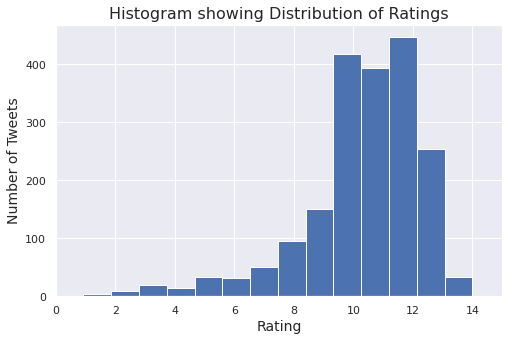

In [123]:
we_rate_dogs['rating'].plot(kind = 'hist', bins = 15)

plt.xlim(0, 15)
plt.ylabel('Number of Tweets', fontsize = 14)
plt.xlabel('Rating', fontsize = 14)
plt.title('Histogram showing Distribution of Ratings', fontsize = 16)
plt.show();

The distribution of ratings is left skewed. From the describe cell above we can also find that 75% of all ratings are between 10 and 14 inclusive (the IQR is from 10 to 12).

In [124]:
# Percentage of tweets with rating of 10 and up
rating_10up_total = sum(we_rate_dogs.rating >= 10)
rating_10up_perc = round(rating_10up_total * 100 / we_rate_dogs.shape[0])
print("Number of tweets with rating 10+:  {}".format(rating_10up_total))
print("Percentage of tweets:                {}%".format(round(rating_10up_perc, 3)))

Number of tweets with rating 10+:  1543
Percentage of tweets:                79%


In [125]:
df_json_data_clean.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [130]:
# are there any tweets having favorite count <= retweet count?
sum(we_rate_dogs.favorite_count <= we_rate_dogs.retweet_count)

0

#### What is the most favourited tweet to date? Top 5?

In [143]:
show_cols = ['name', 'retweet_count', 'favorite_count', 'breed', 'confidence', 'category']

In [144]:
we_rate_dogs.sort_values(by = 'favorite_count', ascending = False)[show_cols].head(5)

,name,retweet_count,favorite_count,breed,confidence,category
306,None,48265,132810,Lakeland_terrier,19,puppo
763,None,79515,131075,Labrador_retriever,82,doggo
58,Duddles,45849,107956,English_springer,38,none
395,Stephan,56625,107015,Chihuahua,50,none
108,Jamesy,32883,106827,French_bulldog,90,pupper


#### What is the most retweeted tweet to date? Top 5.

In [145]:
we_rate_dogs.sort_values(by = 'retweet_count', ascending = False)[show_cols].head(5)

,name,retweet_count,favorite_count,breed,confidence,category
763,None,79515,131075,Labrador_retriever,82,doggo
395,Stephan,56625,107015,Chihuahua,50,none
797,None,52360,75163,Eskimo_dog,50,doggo
306,None,48265,132810,Lakeland_terrier,19,puppo
58,Duddles,45849,107956,English_springer,38,none


It seems like the most retweeted one is a Labrador retriever, with a retweet count of almost 80,000. Whereas the most favorite one is Lakeland terrier with a favorite count of around 13,2810.

#### What is the most common category of dogs which are being tweeted?

In [147]:
we_rate_dogs.category.value_counts()

none       1650
pupper      200
doggo        71
puppo        23
floofer       8
Name: category, dtype: int64

Pupper is the most tweeted dog category.

In [150]:
with_category_sum = sum(we_rate_dogs.category != 'none') # excluding the 'none' categories
tweets_with_category = round(with_category_sum * 100 / len(we_rate_dogs))
print("Number of tweets WITH stage: ", with_category_sum)
print("Percentage of tweets: ",round(tweets_with_category, 3), "%")

Number of tweets WITH stage:  302
Percentage of tweets:  15 %


This shows that a very small proportion of tweets have dog categories specified within them.

#### What are the 10 most common breeds of dogs tweeted about? (Excluding the category 'none'.)

In [151]:
str = "Number of tweets with 'none' predicted breed:  {} ({}%)"
none_count = sum(we_rate_dogs.breed == 'none')
none_perc = none_count * 100 / we_rate_dogs.shape[0]
print(str.format(none_count, round(none_perc)))

str = "Number of distinct breeds:  {}"
print(str.format(len(we_rate_dogs.breed.unique())))

Number of tweets with 'none' predicted breed:  302 (15%)
Number of distinct breeds:  113


In [157]:
top10_breeds_count = \
we_rate_dogs[we_rate_dogs.breed != 'none'].breed.value_counts().head(10)
print("Breed             |  number of tweets")
print("--------------------------")
print(top10_breeds_count)

top10_per = round(sum(top10_breeds_count) * 100 / we_rate_dogs.shape[0])
print("\nTop 10 dog breeds make up {}% of all tweets".format(top10_per))

Breed             |  number of tweets
--------------------------
golden_retriever      153
Labrador_retriever    103
Pembroke               94
Chihuahua              90
pug                    62
toy_poodle             50
chow                   47
Samoyed                42
Pomeranian             40
malamute               33
Name: breed, dtype: int64

Top 10 dog breeds make up 37% of all tweets


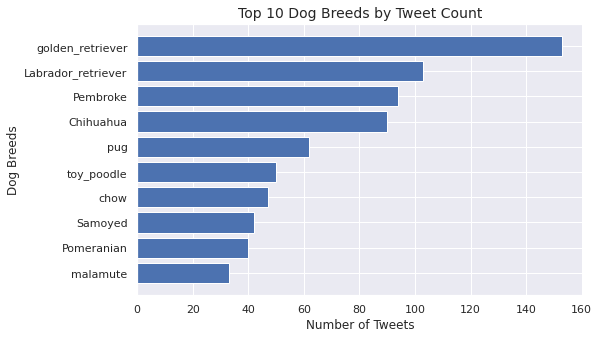

In [164]:
plt.barh(top10_breeds_count.index, top10_breeds_count)

plt.xlabel('Number of Tweets', fontsize = 12)
plt.ylabel('Dog Breeds', fontsize = 12)
plt.title('Top 10 Dog Breeds by Tweet Count', fontsize = 14)
plt.gca().invert_yaxis()
plt.show();

This shows that golden retrivers are the most common dog breeds with a tweet count of 153.

### Bivariate Analysis

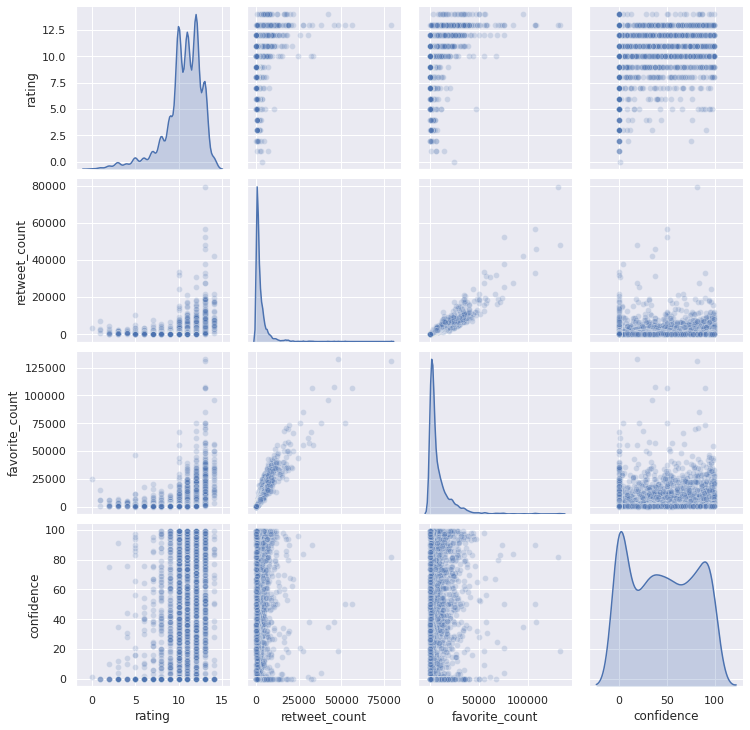

In [165]:
sns.pairplot(we_rate_dogs, 
             vars = ['rating', 'retweet_count', 'favorite_count', 'confidence'], 
             diag_kind = 'kde', plot_kws = {'alpha': 0.2});

#### What dog breeds have the highest overall favourite counts?

In [166]:
fav_counts_breed = we_rate_dogs[we_rate_dogs.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])

fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top10_breeds_fav_counts = fav_counts_breed.head(10)
top10_breeds_fav_counts

breed
golden_retriever      1914145
Labrador_retriever    1253364
Pembroke              1038797
Chihuahua              743689
Samoyed                583906
French_bulldog         570921
chow                   443610
cocker_spaniel         407412
pug                    383817
toy_poodle             337270
Name: favorite_count, dtype: int64

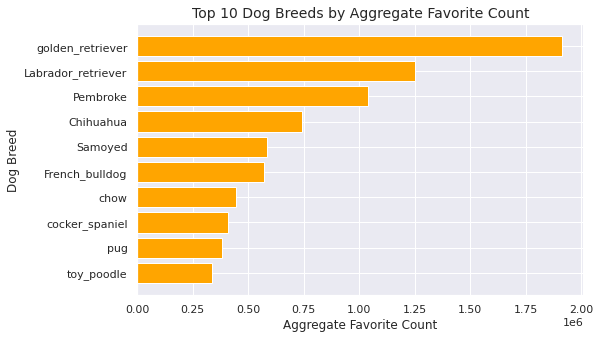

In [167]:
plt.barh(top10_breeds_fav_counts.index, top10_breeds_fav_counts, color = 'orange')

plt.xlabel('Aggregate Favorite Count', fontsize = 12)
plt.ylabel('Dog Breed', fontsize = 12)
plt.title('Top 10 Dog Breeds by Aggregate Favorite Count', fontsize = 14)
plt.gca().invert_yaxis()
plt.show();

The above diagram again shows that the most favorite dog breed from the tweets are found to be golden retreivers.

This is very similar to the earlier plot. So basically the top 10 dog breeds ranked by tweets and favorite counts are the same. Let us see which are the common categories of dogs in both these scenarios.

In [169]:
list(set(top10_breeds_count.index) & set(top10_breeds_fav_counts.index))

['Labrador_retriever',
 'toy_poodle',
 'chow',
 'Chihuahua',
 'Pembroke',
 'pug',
 'golden_retriever',
 'Samoyed']

#### Tweet ratings distributed within each of the dog breeds with highest favourite counts

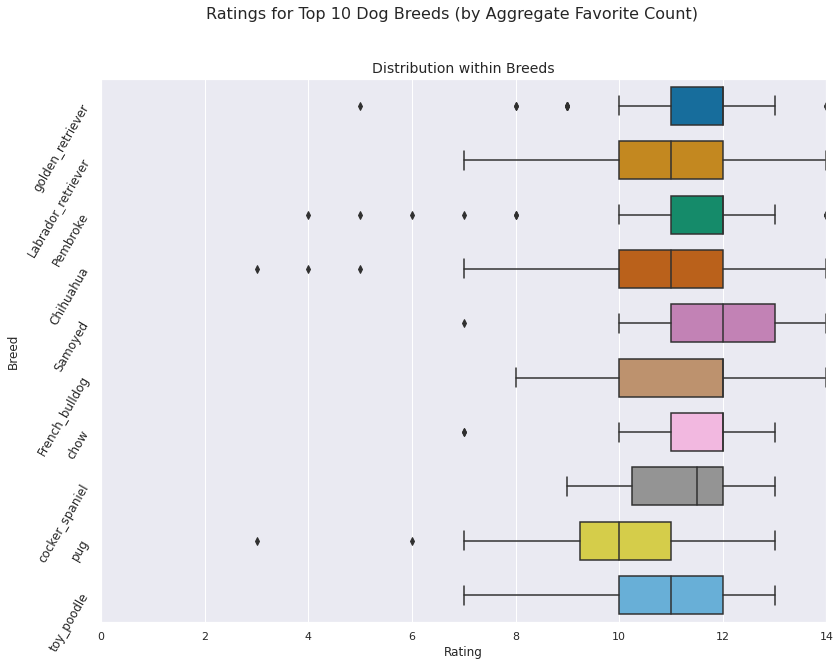

In [176]:
plt.figure(figsize = (13, 10))
bplot = sns.boxplot(y = 'breed', x = 'rating',
                    data = we_rate_dogs,
                    orient = 'h',
                    width = 0.7,
                    palette = "colorblind",
                    order = top10_breeds_fav_counts.index.tolist())
plt.xlim(0, 14) 

# title and labels
plt.suptitle('Ratings for Top 10 Dog Breeds (by Aggregate Favorite Count)', fontsize = 16)
plt.title('Distribution within Breeds', fontsize = 14)
plt.ylabel("Breed",  fontsize = 12)
plt.xlabel('Rating',  fontsize = 12)
plt.yticks(rotation = 60,  fontsize = 12)
plt.show()

The boxplot here shows the distribution of ratings within each of the top 10 dog breeds as ranked by aggregate favourite count. All the breeds range between 7 and 13, with a only a few outliers, while four of the breeds have the lower ratings at 10. Another four breeds have the highest ratings at 14.

#### Tweet ratings distributed by day

In [178]:
# Add random amount of float between [0.0:0.75) to input x
def jitter_val(val):
    random.seed()
    return val + random.uniform(0, 0.75)

In [179]:
# Return the number of days from a timedelta object x
def days_from_start(val):
    return val.days

# start date
first_day = we_rate_dogs.timestamp.min()

# array with days corresponding to timestamp
we_rate_dogs_days = (we_rate_dogs.timestamp - first_day).apply(days_from_start)

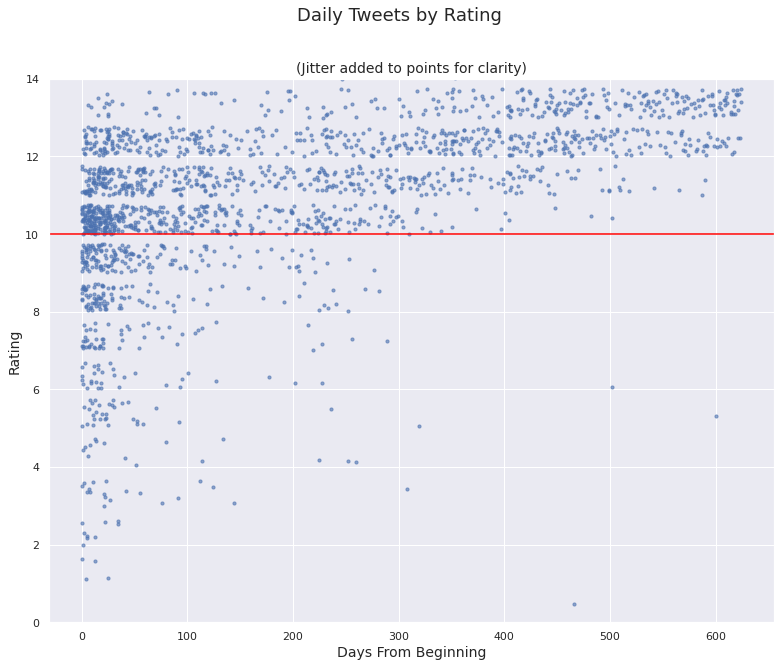

In [180]:
plt.figure(figsize = (13, 10))

# add jitter to the rating so it's not so cluttered on each line
rating_jitter = we_rate_dogs.rating.apply(jitter_val)

plt.scatter(we_rate_dogs_days, rating_jitter, s = 10, alpha = 0.6)

# title and labels
plt.suptitle('Daily Tweets by Rating', fontsize = 18)
plt.title('(Jitter added to points for clarity)', fontsize = 14)

plt.xlabel('Days From Beginning', fontsize = 14)
plt.ylabel('Rating', fontsize = 14)

# add the line at 10 for reference; ratings are out of 10
plt.axhline(y = 10, color = 'red')
plt.ylim(0, 14)

plt.show();

The plot here shows how the ratings are generally over 10 in the latter half of the time period, after the account has been running for 300 days.

### Multivariate Analysis
#### Relationship between favourite and retweet counts with dog rating as colour.

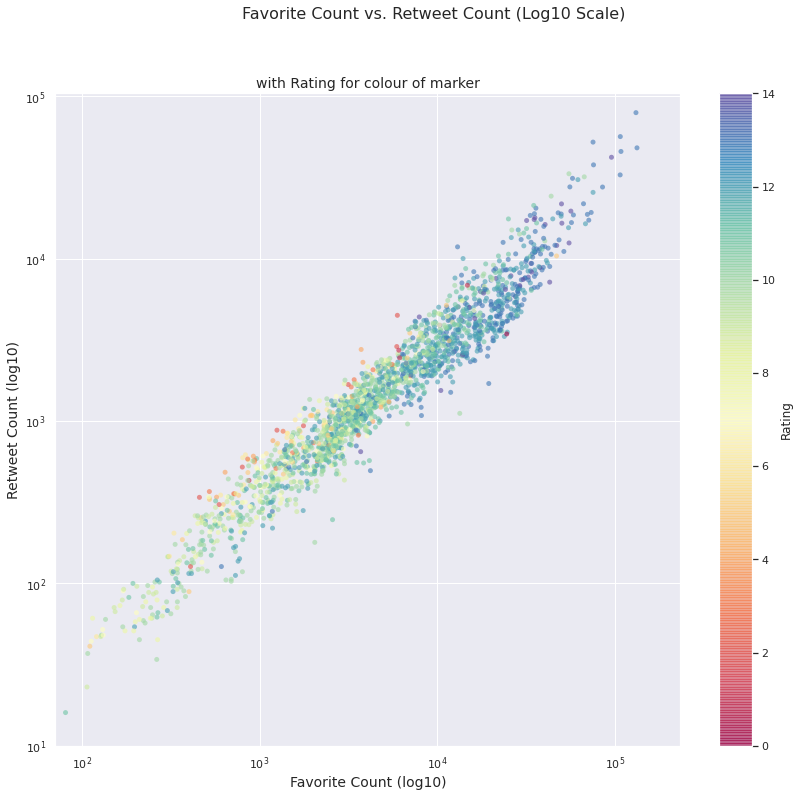

In [181]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

df = we_rate_dogs

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 12))

plt.xscale('log')
plt.yscale('log')
plt.xlim(df['favorite_count'].min() - 10, df['favorite_count'].max() + 100000)
plt.ylim(10, df['retweet_count'].max() + 25000)
colours = df['rating']
markers = 25

plt.scatter(df['favorite_count'], df['retweet_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.6)

# title and labels
plt.suptitle('Favorite Count vs. Retweet Count (Log10 Scale)', fontsize = 16)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Favorite Count (log10)', fontsize = 14)
plt.ylabel('Retweet Count (log10)', fontsize = 14)

# colour bar
cbar = plt.colorbar()
cbar.set_label('Rating')

plt.show();

- This plot shows how there is a strong positive correlation between retweet counts and favorite counts. Although it seems like if someone likes a tweet then they are more likely to retweet it. But I guess it's not always true.  
- The points show a linear trend with a positive slope which suggests as the favourite count increases, the retweet count also increases.  

- Also as seem from the concentration of the blue points, it is clear that tweets with high favorite counts and high retweet counts have a higher rating.

#### Favourite counts over time, with dog rating as colour.

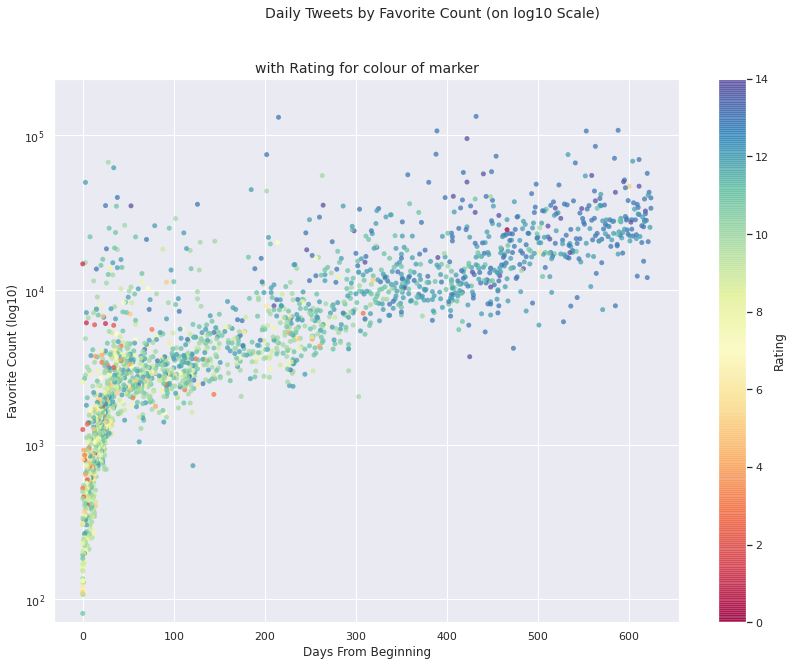

In [183]:
# Adapted from an answer from: 
# https://stackoverflow.com/questions/25741214/how-to-use-colormaps-to-color-plots-of-pandas-dataframes
# -------------------------------------------------------------------------

cmap = cm.get_cmap('Spectral') # Colour map (there are many others)
plt.figure(figsize = (14, 10))

plt.yscale('log')
plt.ylim(we_rate_dogs['favorite_count'].min() - 10, 
         we_rate_dogs['favorite_count'].max() + 100000)
colours = we_rate_dogs['rating']
markers = 25

plt.scatter(we_rate_dogs_days, we_rate_dogs['favorite_count'], 
            c = colours, s = markers, cmap = cmap, edgecolor = 'None', alpha = 0.75)

# title and labels
plt.suptitle('Daily Tweets by Favorite Count (on log10 Scale)', fontsize = 14)
plt.title('with Rating for colour of marker', fontsize = 14)
plt.xlabel('Days From Beginning', fontsize = 12)
plt.ylabel('Favorite Count (log10)', fontsize = 12)

cbar = plt.colorbar()
cbar.set_label('Rating')
plt.show();

- In the above plot the x-axis scale is reversed showing time in the past, and moving forward from left to right. From the plot it is clear that the more recent tweets are rated consistently higher (marked in the colours blue and green) than that of the older tweets (marked in the colours yellow and green).   

- Another thing to note is that the tweets which are older than 1100 days have lower favourite counts. This was probably because it was the initial phases of the twitter account, with much less followers.

- There is also a steady increase in the slope of the line from around 1100 days, which reflects the how the tweets were being favorited on a daily basis. This again proves that the twitter account had a steady increase in its followers, who were active dring the timeframe represented in the archive.

- There are much more variability in ratings of the older tweets as seen by the range of colours (more yellow and green), and also in the range of favorite_count.